In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

# modelling
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Tampilan angka
pd.options.display.float_format = '{:,.2f}'.format

<B>PENDAHULUAN</B>

In [10]:
tkt_kon_2020 = pd.read_csv("Rata-rata Pengeluaran Perkapita Seminggu 2020 final.csv")
tkt_kon_2020

,Kelompok Pengeluaran,Komoditas Makanan,Pengeluaran per minggu per kapita
0,"<150,000",PADI-PADIAN,9973
1,"<150,000","Beras (beras lokal, kualitas unggul, impor)",8690
2,"<150,000",Beras ketan,0
3,"<150,000",Jagung basah degan kulit,0
4,"<150,000",Jagung pipilan/beras jagung/jagung titi,1153
...,...,...,...
1687,Rata-Rata per Kapita,Rokok kretek filter,13122
1688,Rata-Rata per Kapita,Rokok kretek tanpa filter,2679
1689,Rata-Rata per Kapita,Rokok putih,847
1690,Rata-Rata per Kapita,Tembakau,276


In [17]:
describe_2020 = tkt_kon_2020.groupby("Kelompok Pengeluaran").describe()
describe_2020

Pengeluaran per minggu per kapita                    \
                                                  count     mean      std   
Kelompok Pengeluaran                                                        
1,000,000 - 1,499,999                            188.00 1,698.62 4,543.68   
150,000 - 199,999                                188.00   325.12 1,203.59   
200,000 - 299,999                                188.00   449.24 1,489.73   
300,000 - 499,999                                188.00   664.47 1,932.95   
500,000 - 749,999                                188.00   964.17 2,638.15   
750,000 - 999,999                                188.00 1,287.71 3,452.68   
<150,000                                         188.00   266.54 1,045.01   
>1,500,000                                       188.00 2,406.16 6,299.77   
Rata-Rata per Kapita                             188.00 1,285.96 3,413.43   

                                                              
                        min    25%    50%      75%       max  
Kelompok Pengeluaran                                          
1,000,000 - 1,499,999  6.00 163.75 461.50 1,212.75 42,815.00  
150,000 - 199,999      0.00  10.00  49.00   192.00 11,397.00  
200,000 - 299,999      0.00  34.25  94.00   229.50 13,194.00  
300,000 - 499,999      4.00  58.75 163.50   352.50 14,809.00  
500,000 - 749,999      4.00  86.50 258.00   542.25 21,595.00  
750,000 - 999,999      5.00 126.25 358.50   809.50 31,050.00  
<150,000               0.00   0.00   0.00   130.00  9,973.00  
>1,500,000            10.00 263.25 632.50 1,800.25 62,423.00  
Rata-Rata per Kapita   5.00 130.00 367.50   852.75 30,910.00

In [18]:
list_max_2020 = describe_2020['Pengeluaran per minggu per kapita', 'max'].tolist()

In [19]:
for i in list_max_2020:
    a = (tkt_kon_2020.loc[tkt_kon_2020['Pengeluaran per minggu per kapita']==i])
    print(a["Kelompok Pengeluaran"].to_string(index=False),a["Komoditas Makanan"].to_string(index=False))

1,000,000 - 1,499,999 MAKANAN MINUMAN JADI
150,000 - 199,999 PADI-PADIAN
200,000 - 299,999 PADI-PADIAN
300,000 - 499,999 PADI-PADIAN
500,000 - 749,999 MAKANAN MINUMAN JADI
750,000 - 999,999 MAKANAN MINUMAN JADI
<150,000 PADI-PADIAN
>1,500,000 MAKANAN MINUMAN JADI
Rata-Rata per Kapita MAKANAN MINUMAN JADI


In [20]:
tkt_kon_2020_gr=tkt_kon_2020[tkt_kon_2020['Komoditas Makanan'].isin(['PADI-PADIAN','UMBI-UMBIAN','IKAN','DAGING','TELUR DAN SUSU','SAYUR-SAYURAN','KACANG-KACANGAN','BUAH-BUAHAN','MINYAK DAN KELAPA','BUMBU-BUMBUAN','MAKANAN MINUMAN JADI','ROKOK DAN TEMBAKAU'])]
tkt_kon_2020_gr

,Kelompok Pengeluaran,Komoditas Makanan,Pengeluaran per minggu per kapita
0,"<150,000",PADI-PADIAN,9973
7,"<150,000",UMBI-UMBIAN,2878
15,"<150,000",IKAN,1206
52,"<150,000",DAGING,2872
64,"<150,000",TELUR DAN SUSU,387
...,...,...,...
1612,Rata-Rata per Kapita,BUAH-BUAHAN,5607
1626,Rata-Rata per Kapita,MINYAK DAN KELAPA,3405
1639,Rata-Rata per Kapita,BUMBU-BUMBUAN,2622
1657,Rata-Rata per Kapita,MAKANAN MINUMAN JADI,30910


In [21]:
tkt_kon_rata2_2020 = tkt_kon_2020_gr[tkt_kon_2020_gr["Kelompok Pengeluaran"] == "Rata-Rata per Kapita"]
tkt_kon_rata2_2020

,Kelompok Pengeluaran,Komoditas Makanan,Pengeluaran per minggu per kapita
1504,Rata-Rata per Kapita,PADI-PADIAN,17292
1511,Rata-Rata per Kapita,UMBI-UMBIAN,1677
1519,Rata-Rata per Kapita,IKAN,10369
1556,Rata-Rata per Kapita,DAGING,6336
1568,Rata-Rata per Kapita,TELUR DAN SUSU,6011
1578,Rata-Rata per Kapita,SAYUR-SAYURAN,10337
1604,Rata-Rata per Kapita,KACANG-KACANGAN,2513
1612,Rata-Rata per Kapita,BUAH-BUAHAN,5607
1626,Rata-Rata per Kapita,MINYAK DAN KELAPA,3405
1639,Rata-Rata per Kapita,BUMBU-BUMBUAN,2622


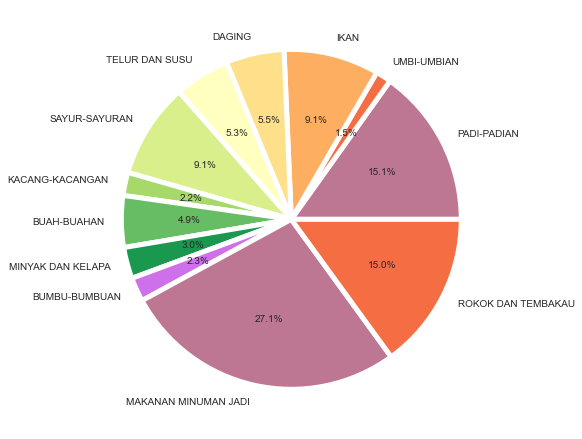

In [22]:
color = ["#be7793","#f46d43","#fdae61","#fee08b","#ffffbf","#d9ef8b","#a6d96a","#66bd63","#1a9850","#ce70ea"]
plt.figure(figsize=[8,8])
plt.pie(tkt_kon_rata2_2020["Pengeluaran per minggu per kapita"], labels=tkt_kon_rata2_2020["Komoditas Makanan"], autopct='%1.1f%%', wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white'}, colors=color)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Kelompok Pengeluaran', ylabel='Pengeluaran per minggu per kapita'>

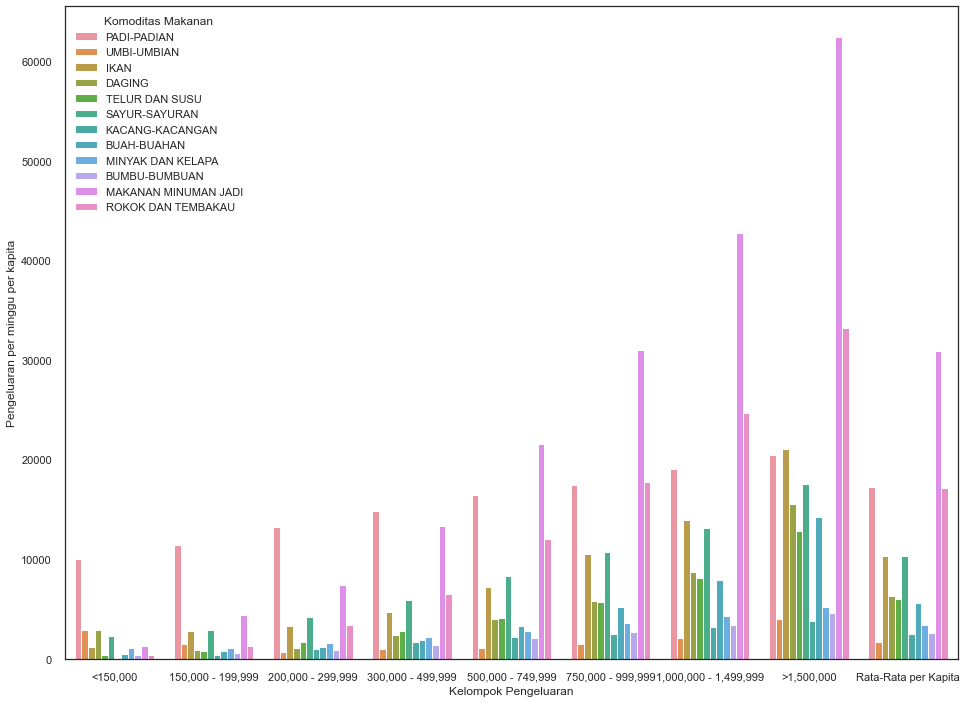

In [53]:
#set seaborn plotting aesthetics
sns.set(style='white',rc={'figure.figsize':(16,12)})

#create grouped bar chart
sns.barplot(x='Kelompok Pengeluaran', y='Pengeluaran per minggu per kapita', hue='Komoditas Makanan', data=tkt_kon_2020_gr) 

<B>EXPLORATORY DATA ANALYSIS</B>

In [92]:
per_daerah_2020 = pd.read_csv("Pengeluaran_per_kabupaten_kota_2020.csv")
per_daerah_2020.head(7)

,Kabupaten/Kota,TOTAL,DAGING,TELUR DAN SUSU,IKAN,Daging_sapi,"Daging_kambing,_domba/biri-biri",Daging_babi,Daging_ayam_ras,Daging_ayam_kampung,...,Selar_diawetkan,Sepat_diawetkan,Bandeng_diawetkan,Gabus_diawetkan,"Ikan_dalam_kaleng_(sardencis,_tuna_dalam_kaleng,_dsb)",Ikan_diawetkan_lainnya,"Udang_diawetkan_(ebi,_rebon)","Cumi-cumi,_sotong,_gurita_diawetkan",Kerang_dan_hewan_air_lainnya_yang_diawetkan,Ikan_matang
0,Simeulue,23492,2374,5266,15852,94,0,0,766,779,...,23,0,0,13,3,193,18,31,15,637
1,Aceh Singkil,26374,4181,5871,16322,229,141,91,2504,370,...,22,6,22,27,2,520,46,0,33,300
2,Aceh Selatan,26993,3273,4714,19006,0,0,0,1393,953,...,254,7,0,31,13,189,164,10,26,381
3,Aceh Tenggara,26058,6386,4945,14727,1106,44,140,2053,1321,...,541,44,2,24,155,629,206,12,84,828
4,Aceh Timur,25453,2804,4916,17733,179,139,0,1251,600,...,69,0,20,20,40,211,45,0,22,64
5,Aceh Tengah,33593,7232,8642,17719,965,260,0,2192,1196,...,101,14,0,0,35,565,14,0,37,1838
6,Aceh Barat,34547,4490,6761,23296,673,0,4,1752,1275,...,61,4,28,57,22,156,229,24,8,501


In [94]:
per_daerah_2019 = pd.read_csv("Pengeluaran_per_kabupaten_kota_2019.csv")
per_daerah_2019.head(7)

,Kabupaten/Kota,TOTAL,DAGING,TELUR DAN SUSU,IKAN,Daging_sapi,"Daging_kambing,_domba/biri-biri",Daging_babi,Daging_ayam_ras,Daging_ayam_kampung,...,Selar_diawetkan,Sepat_diawetkan,Bandeng_diawetkan,Gabus_diawetkan,"Ikan_dalam_kaleng_(sardencis,_tuna_dalam_kaleng,_dsb)",Ikan_diawetkan_lainnya,"Udang_diawetkan_(ebi,_rebon)","Cumi-cumi,_sotong,_gurita_diawetkan",ang_dan_hewan_air_lainnya_yang_diawetkan,Ikan_matang
0,Simeulue,22868,2972,4954,14942,517,0,0,768,1103,...,87,2,0,4,13,190,4,0,4,1201
1,Aceh Singkil,23447,2562,4844,16041,210,0,108,1331,153,...,19,24,0,7,22,666,9,15,109,1249
2,Aceh Selatan,23642,1811,4098,17733,72,0,0,892,463,...,231,23,0,0,23,148,116,0,6,640
3,Aceh Tenggara,25578,5651,4468,15459,617,98,374,2232,1310,...,219,44,26,20,117,510,353,11,28,305
4,Aceh Timur,20485,2837,3649,13999,669,0,0,1116,479,...,107,1,59,0,27,128,12,0,33,93
5,Aceh Tengah,25053,3862,6536,14655,168,0,0,1901,587,...,55,26,11,7,35,577,24,11,33,435
6,Aceh Barat,29643,4614,5385,19644,144,0,0,1391,1019,...,14,0,2,63,30,192,202,1,17,797


In [59]:
per_daerah_2020.describe()

,TOTAL,DAGING,TELUR DAN SUSU,IKAN,Daging_sapi,"Daging_kambing,_domba/biri-biri",Daging_babi,Daging_ayam_ras,Daging_ayam_kampung,Daging_segar_lainnya,...,Selar_diawetkan,Sepat_diawetkan,Bandeng_diawetkan,Gabus_diawetkan,"Ikan_dalam_kaleng_(sardencis,_tuna_dalam_kaleng,_dsb)",Ikan_diawetkan_lainnya,"Udang_diawetkan_(ebi,_rebon)","Cumi-cumi,_sotong,_gurita_diawetkan",Kerang_dan_hewan_air_lainnya_yang_diawetkan,Ikan_matang
count,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,...,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00
mean,"29,317.46","7,965.73","7,475.58","13,876.15",684.06,30.10,851.44,"3,100.92",849.31,149.11,...,59.54,79.12,55.60,30.35,142.96,337.64,41.30,30.12,22.33,936.12
std,"10,087.24","4,509.79","2,699.15","6,010.05",796.72,48.56,"2,067.32","2,135.25",684.33,345.92,...,79.09,168.13,130.63,61.89,531.04,383.90,106.01,78.31,44.57,965.41
min,"11,730.00",168.00,"2,074.00",10.00,0.00,0.00,0.00,32.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"21,694.75","5,047.25","5,560.25","9,355.25",199.00,0.00,0.00,"1,526.75",406.00,16.25,...,12.00,0.00,0.00,0.00,8.25,107.25,0.25,0.00,1.00,301.75
50%,"26,933.50","7,168.50","6,904.00","13,651.50",418.50,8.00,39.50,"2,761.50",637.50,59.00,...,36.50,11.00,8.00,5.00,42.00,237.50,10.00,3.00,10.00,640.50
75%,"35,096.00","10,185.00","9,052.50","17,638.00",841.75,41.00,591.50,"4,130.00","1,057.25",150.75,...,74.00,74.75,41.00,24.00,123.25,434.00,36.00,18.00,28.00,"1,235.50"
max,"74,505.00","43,543.00","16,903.00","48,947.00","5,626.00",314.00,"23,675.00","18,621.00","4,441.00","4,699.00",...,664.00,"1,230.00","1,257.00",587.00,"7,166.00","3,696.00","1,353.00",567.00,698.00,"8,051.00"


In [62]:
per_daerah_2019.describe()

,TOTAL,DAGING,TELUR DAN SUSU,IKAN,Daging_sapi,"Daging_kambing,_domba/biri-biri",Daging_babi,Daging_ayam_ras,Daging_ayam_kampung,Daging_segar_lainnya,...,Selar_diawetkan,Sepat_diawetkan,Bandeng_diawetkan,Gabus_diawetkan,"Ikan_dalam_kaleng_(sardencis,_tuna_dalam_kaleng,_dsb)",Ikan_diawetkan_lainnya,"Udang_diawetkan_(ebi,_rebon)","Cumi-cumi,_sotong,_gurita_diawetkan",ang_dan_hewan_air_lainnya_yang_diawetkan,Ikan_matang
count,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,...,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00,514.00
mean,"27,252.52","7,332.35","6,928.90","12,991.27",657.52,30.27,741.95,"2,820.83",812.98,154.28,...,60.84,95.14,52.00,34.04,95.08,343.28,38.65,26.21,28.62,891.23
std,"9,174.27","3,939.07","2,519.79","5,396.10",742.34,58.48,"1,703.62","1,860.97",715.85,367.53,...,83.34,203.45,123.93,70.32,276.91,405.61,92.98,71.40,48.59,885.15
min,"7,417.00",493.00,804.00,0.00,0.00,0.00,0.00,76.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"20,185.25","4,543.75","5,087.25","9,165.25",176.25,0.00,0.00,"1,316.75",381.50,15.00,...,13.00,0.00,0.00,0.00,8.00,109.75,0.00,0.00,2.25,283.50
50%,"25,411.50","6,807.50","6,520.50","12,823.00",430.50,3.00,43.00,"2,519.00",611.50,49.00,...,35.00,12.50,8.00,5.00,32.00,241.00,9.00,2.00,13.00,605.00
75%,"33,006.75","9,480.50","8,320.75","16,543.50",816.75,36.00,535.75,"3,860.50",989.00,139.50,...,74.75,97.00,41.75,32.00,94.00,410.75,33.00,17.00,33.00,"1,243.75"
max,"56,473.00","25,087.00","15,170.00","34,574.00","4,736.00",538.00,"14,463.00","14,830.00","5,543.00","3,904.00",...,820.00,"1,294.00","1,044.00",641.00,"3,672.00","3,877.00","1,210.00",723.00,431.00,"6,360.00"


In [60]:
print(per_daerah_2020.isnull().values.any())
print(per_daerah_2020.isna().values.any())

False
False


In [63]:
print(per_daerah_2019.isnull().values.any())
print(per_daerah_2019.isna().values.any())

False
False


(array([  2.,   4.,  13., 103., 201., 118.,  53.,  12.,   0.,   0.,   3.,
          2.,   2.,   0.,   1.]),
 array([-11515.,  -8709.,  -5903.,  -3097.,   -291.,   2515.,   5321.,
          8127.,  10933.,  13739.,  16545.,  19351.,  22157.,  24963.,
         27769.,  30575.]),
 <BarContainer object of 15 artists>)

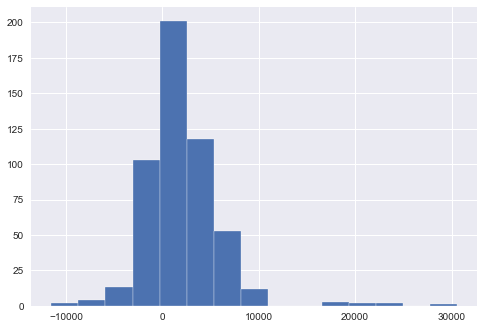

In [96]:
diff = sorted(per_daerah_2020["TOTAL"]-per_daerah_2019["TOTAL"])
plt.hist(diff,bins=15)

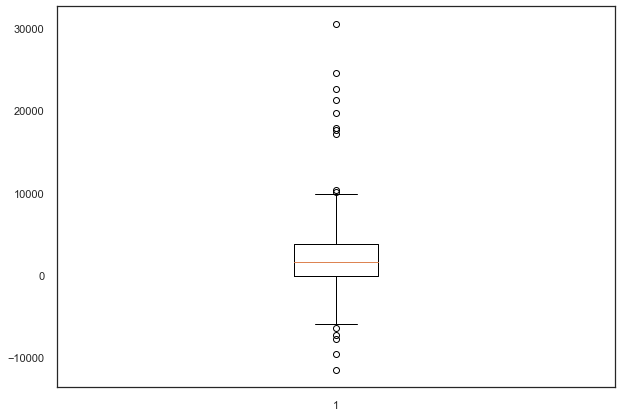

In [65]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(diff)
 
# show plot
plt.show()

<b>HYPOTHESIS TESTING</b>

Untuk statistical testing akan dilakukan uji z-test dua sampel dengan confidence interval 95% untuk melihat apakah kenaikan konsumsi protein seiring dengan kenaikan pengeluaran untuk bahan protein hewani. 

Hipotesis-nya adalah sebagai berikut:

H0: 𝜇2020−𝜇2019 ≤ 0 

H1: 𝜇2020−𝜇2019 > 0

H0 : Pengeluaran untuk bahan makanan protein hewani pada tahun 2020 lebih kecil atau tidak berbeda dengan tahun 2019.

H1 : Pengeluaran untuk protein hewani pada tahun 2020 lebih besar dibandingkan tahun 2019.


In [66]:
print("Rata-rata 2020 adalah","{:,.2f}".format(per_daerah_2020["TOTAL"].mean()))
print("Rata-rata 2019 adalah","{:,.2f}".format(per_daerah_2019["TOTAL"].mean()))

Rata-rata 2020 adalah 29,317.46
Rata-rata 2019 adalah 27,252.52


In [67]:
z_crit = stats.norm.ppf(1-0.05)
result = ztest(per_daerah_2020["TOTAL"],per_daerah_2019["TOTAL"],value=0)
z_stat = result[0]
p_value = result[1]

In [68]:
print("statistics",(z_stat))
print("critical point",(z_crit))
print("p-value",(p_value))

statistics 3.4334177036178506
critical point 1.6448536269514722
p-value 0.0005960231085364535


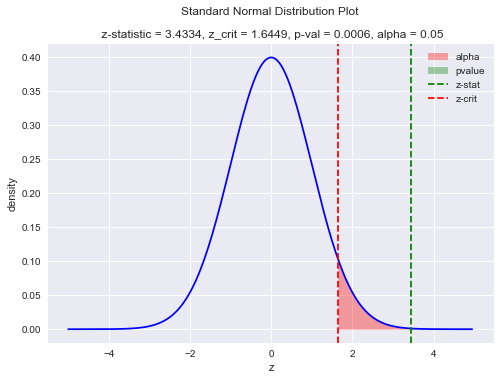

In [69]:
plt.style.use('seaborn')

# plot sample distribution 
x = np.arange(-5, 5, 0.05)
plt.plot(x, stats.norm.pdf(x, 0, 1), 
         color='blue')

# plot alpha region
x_alpha = np.arange(z_crit,5, 0.05)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(z_stat,5, 0.05)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(z_stat, 5), 
            color ="green", 
            linestyle = "--", 
            label ="z-stat")
plt.axvline(z_crit, 
            color ="red", 
            linestyle = "--", 
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")

plt.title(f'Standard Normal Distribution Plot \n\n z-statistic = {np.round(z_stat, 4)}, z_crit = {np.round(z_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.05');

In [70]:
if z_stat>z_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [71]:
# write code here
if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


<B>MODEL REGRESI</B>

Perkiraan proporsi protein

Memperkirakan pengeluaran total untuk protein dari pengeluaran untuk pengeluaran paling besar dari masing2 
kelompok daging, ikan dan telur-susu


total_protein_hewani = daging_ayam_ras(x) + ikan_tongkol(y) + telur_ayam_ras(z)

total_protein_hewani = daging(x) + ikan(y) + telur_susu(z) + diatas 300 ribu per minggu (w)

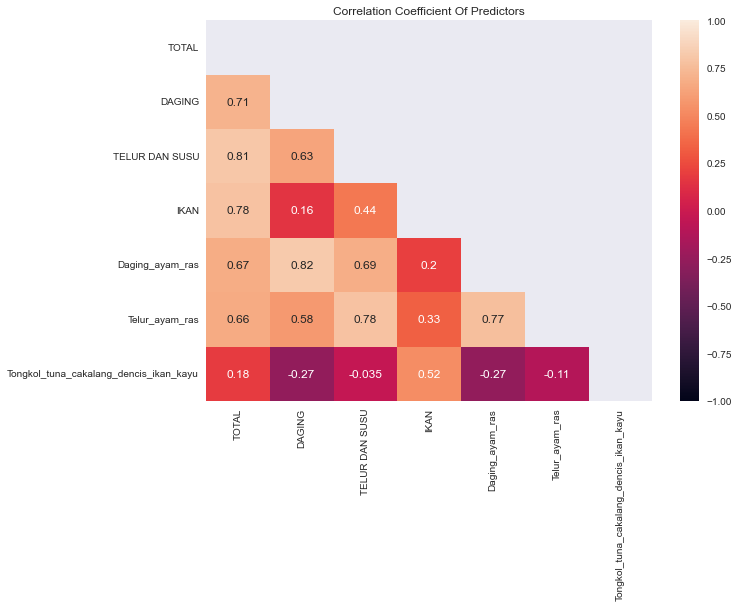

In [72]:
per_daerah_corr=per_daerah_2020[['TOTAL','DAGING','TELUR DAN SUSU','IKAN','Daging_ayam_ras', 'Telur_ayam_ras','Tongkol_tuna_cakalang_dencis_ikan_kayu']]
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(per_daerah_corr.corr(), dtype=bool))

# generate heatmap
sns.heatmap(per_daerah_corr.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

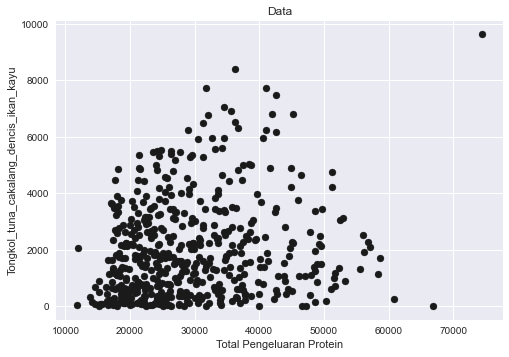

In [102]:
x = per_daerah_2020["Tongkol_tuna_cakalang_dencis_ikan_kayu"]
y = per_daerah_2020["TOTAL"]

# Plot the data
plt.scatter(y,x, color = "k")

# Add a legend and labels

plt.xlabel("Total Pengeluaran Protein")
plt.ylabel("Tongkol_tuna_cakalang_dencis_ikan_kayu")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

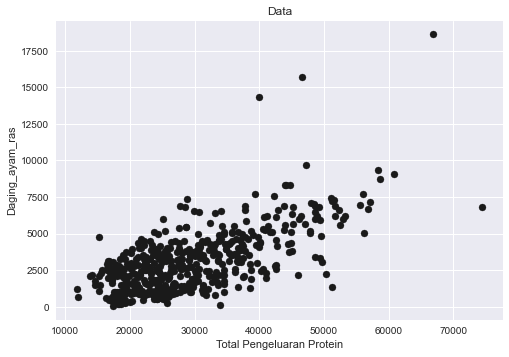

In [103]:
x = per_daerah_2020["Daging_ayam_ras"]
y = per_daerah_2020["TOTAL"]

# Plot the data
plt.scatter(y,x, color = "k")

# Add a legend and labels

plt.xlabel("Total Pengeluaran Protein")
plt.ylabel("Daging_ayam_ras")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

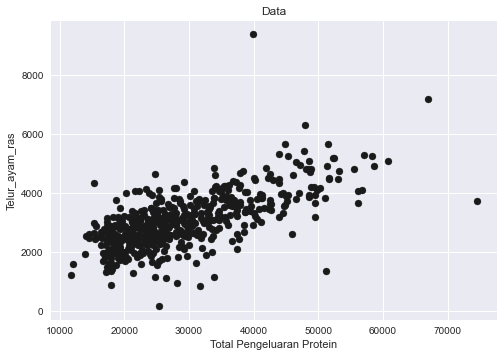

In [104]:
x = per_daerah_2020["Telur_ayam_ras"]
y = per_daerah_2020["TOTAL"]

# Plot the data
plt.scatter(y,x, color = "k")

# Add a legend and labels

plt.xlabel("Total Pengeluaran Protein")
plt.ylabel("Telur_ayam_ras")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [76]:
def print_coef_std_err(results):
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [77]:
# Create OLS model object
model = ols("TOTAL ~ Tongkol_tuna_cakalang_dencis_ikan_kayu", per_daerah_2020)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_ikan = print_coef_std_err(results)

In [78]:
results_ikan

,coef,std err
Intercept,"27,223.05",664.44
Tongkol_tuna_cakalang_dencis_ikan_kayu,1.06,0.25


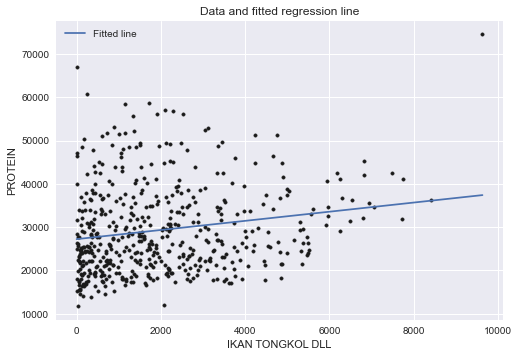

In [79]:
predictor = "Tongkol_tuna_cakalang_dencis_ikan_kayu"
outcome = "TOTAL"
data = per_daerah_2020.copy()
results_ = results_ikan.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("PROTEIN")
plt.xlabel("IKAN TONGKOL DLL")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [80]:
# Create OLS model object
model = ols("TOTAL ~ Daging_ayam_ras", per_daerah_2020)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_ayam = print_coef_std_err(results)

In [81]:
results_ayam

,coef,std err
Intercept,"19,468.72",581.71
Daging_ayam_ras,3.18,0.15


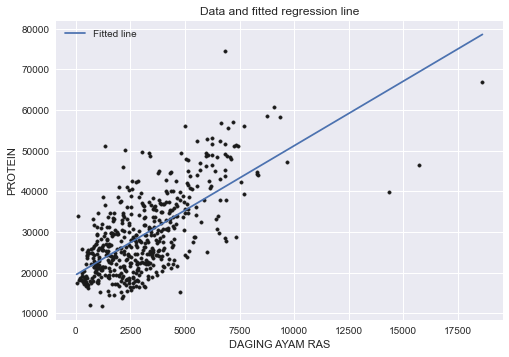

In [82]:
predictor = "Daging_ayam_ras"
outcome = "TOTAL"
data = per_daerah_2020.copy()
results_ = results_ayam.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("PROTEIN")
plt.xlabel("DAGING AYAM RAS")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [83]:
# Create OLS model object
model = ols("TOTAL ~ Telur_ayam_ras", per_daerah_2020)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_telur = print_coef_std_err(results)

In [84]:
results_telur

,coef,std err
Intercept,"7,380.75","1,140.06"
Telur_ayam_ras,7.12,0.35


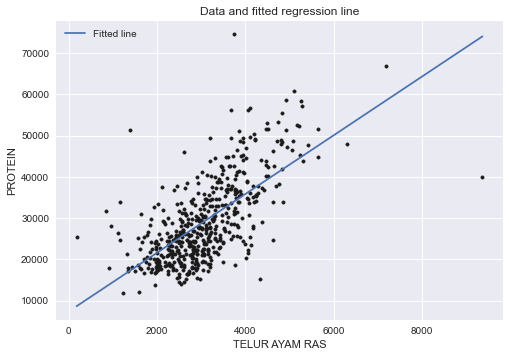

In [105]:
predictor = "Telur_ayam_ras"
outcome = "TOTAL"
data = per_daerah_2020.copy()
results_ = results_telur.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("PROTEIN")
plt.xlabel("TELUR AYAM RAS")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [86]:
# Create OLS model object
model = ols("TOTAL ~ Daging_ayam_ras+ Telur_ayam_ras", per_daerah_2020)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_ = print_coef_std_err(results)

In [87]:
results_

,coef,std err
Intercept,"11,614.80","1,193.82"
Daging_ayam_ras,1.87,0.23
Telur_ayam_ras,3.87,0.52


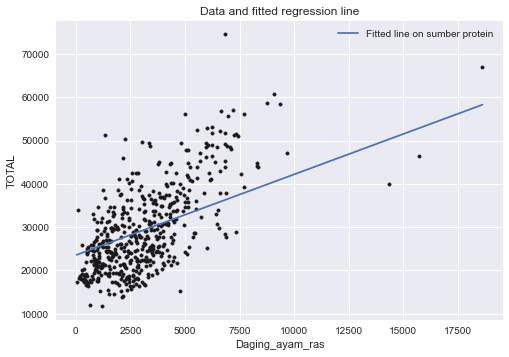

In [88]:
predictors = ["Daging_ayam_ras","Telur_ayam_ras"]
outcome = "TOTAL"
data = per_daerah_2020.copy()
results_ = results_.copy()

# Plot the data
plt.scatter(data[predictors[0]], data[outcome], color = "k", marker=".")


# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]


fitted_values = beta0_hat +  beta1_hat * x_domain  + beta2_hat * data[predictors[1]].mean()

# Plot two fitted line
plt.plot(x_domain, fitted_values, label = f"Fitted line on sumber protein")

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [89]:
# Create OLS model object
model = ols("TOTAL ~ Daging_ayam_ras + Telur_ayam_ras + Daging_ayam_ras:Telur_ayam_ras", per_daerah_2020)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_ayam_ras = print_coef_std_err(results)
results_ayam_ras

,coef,std err
Intercept,"9,616.02","1,527.84"
Daging_ayam_ras,2.54,0.39
Telur_ayam_ras,4.43,0.58
Daging_ayam_ras:Telur_ayam_ras,-0.00,0.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


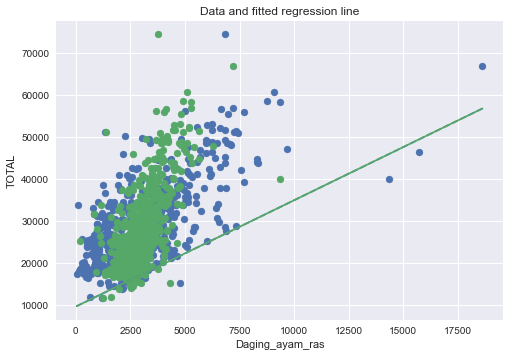

In [90]:
predictors = ["Daging_ayam_ras","Telur_ayam_ras","Daging_ayam_ras:Telur_ayam_ras"]
outcome = "TOTAL"
data = per_daerah_2020.copy()
results_ = results_ayam_ras.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}


# Plot the data
# for i in range(2):
#     plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
#                 color = c[i], marker = markers[i])
plt.scatter(data['Daging_ayam_ras'],data['TOTAL'])
plt.scatter(data['Telur_ayam_ras'],data['TOTAL'])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

# Plot two fitted line
# for i in range(2):
#     plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (mom_hs={i})", linestyle = linestyles[i])
plt.plot(x_domain, fitted_values[0], c = c[0], linestyle = linestyles[0])
plt.plot(x_domain, fitted_values[1], c = c[1], linestyle = linestyles[1])



# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()
##coba dicari lagi sebab garis-nya bisa sama persis dan multicollinearity-nya

<B>MULTICOLLINEARITY TEST</B>

In [91]:
X = data[['Daging_ayam_ras', 'Telur_ayam_ras','Tongkol_tuna_cakalang_dencis_ikan_kayu']]
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


#view VIF for each explanatory variable 
vif

,variable,VIF
0,Daging_ayam_ras,7.42
1,Telur_ayam_ras,10.56
2,Tongkol_tuna_cakalang_dencis_ikan_kayu,2.35
